# Assignment (Intro to Neural Network)

### The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:
- Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
- Data fetching and understand the train/val/test splits.
- Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (18points)
- Print the classification metric report (6 points)
- Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (12 points)
- Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (6 points)
- Implement batch normalization for training the neural network (6 points)
- Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (12 points)

In [63]:
# imports
import pandas as pd
import numpy as np
import tensorflow as tf
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout,Reshape, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn import model_selection


# loading & understanding data
h5f = h5py.File('SVHN_single_grey1.h5', 'r') # opened as read only

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
# Close the file
h5f.close()

print("shape of train features",x_train.shape)
print("shape of train labels",y_train.shape)

print("shape of validataion features",x_val.shape)
print("shape of validataion labels",y_val.shape)

print("shape of test features",x_test.shape)
print("shape of test labels",y_test.shape)

shape of train features (42000, 32, 32)
shape of train labels (42000,)
shape of validataion features (60000, 32, 32)
shape of validataion labels (60000,)
shape of test features (18000, 32, 32)
shape of test labels (18000,)


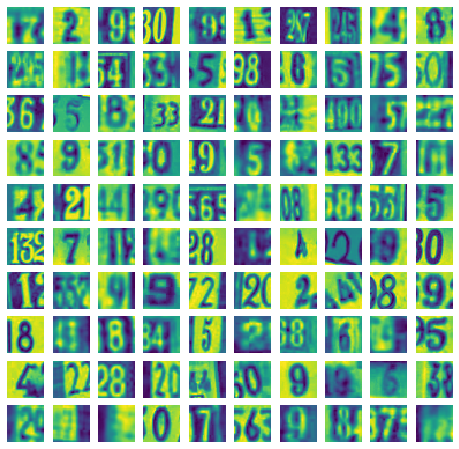

In [2]:
# visualising first few images 
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [3]:
# Data normalisation
x_train /= 255
x_val /= 255
x_test /= 255

In [4]:
# Flatening the input data from 32*32 to 1024 to fit to KNN model
train_sample_rows = x_train.shape[0]
x_tr = []
for i in range(train_sample_rows):
    x_tr.append(x_train[i,:].flatten())

    validation_sample_rows = x_val.shape[0]
x_vl = []
for i in range(validation_sample_rows):
    x_vl.append(x_val[i,:].flatten())
    
test_sample_rows = x_test.shape[0]
x_te = []
for i in range(test_sample_rows):
    x_te.append(x_test[i,:].flatten())


print("shape of new training data set after flattening",len(x_tr),len(x_tr[0]))

print("shape of new validation data set after flattening",len(x_vl),len(x_vl[0]))

print("shape of new test data set after flattening",len(x_te),len(x_te[0]))

shape of new training data set after flattening 42000 1024
shape of new validation data set after flattening 60000 1024
shape of new test data set after flattening 18000 1024


### KNN approach

In [5]:
# KNN implementation
for i in range(1,20,2):
## Instantiate the model with 5 neighbors. 
  knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', metric='euclidean')
## Fit the model on the training data.
  knn.fit(x_tr, y_train)
#Predict the response for test dataset 
  y_pred = knn.predict(x_te)
#Import scikit-learn metrics module for accuracy calculation
  
# Model Accuracy, how often is the classifier correct?
  print("Accuracy for k ",i," is ",accuracy_score(y_test, y_pred))

Accuracy for k  1  is  0.45916666666666667
Accuracy for k  3  is  0.4617777777777778
Accuracy for k  5  is  0.49016666666666664
Accuracy for k  7  is  0.5070555555555556
Accuracy for k  9  is  0.5124444444444445
Accuracy for k  11  is  0.518
Accuracy for k  13  is  0.5210555555555556
Accuracy for k  15  is  0.5235555555555556
Accuracy for k  17  is  0.5287222222222222
Accuracy for k  19  is  0.5271666666666667


In [6]:
knn_best = KNeighborsClassifier(n_neighbors=19,algorithm='brute', metric='euclidean')
knn_best.fit(x_tr, y_train)
y_pred = knn.predict(x_te)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.70      0.54      1814
           1       0.46      0.73      0.57      1828
           2       0.62      0.55      0.58      1803
           3       0.44      0.42      0.43      1719
           4       0.66      0.65      0.65      1812
           5       0.52      0.39      0.44      1768
           6       0.50      0.41      0.45      1832
           7       0.70      0.62      0.66      1808
           8       0.47      0.37      0.41      1812
           9       0.56      0.42      0.48      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.52     18000
weighted avg       0.54      0.53      0.52     18000



In [64]:
# loading & understanding data
h5f = h5py.File('SVHN_single_grey1.h5', 'r') # opened as read only

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
# Close the file
h5f.close()

In [65]:
# Converting labels to categorical variables 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)


x_train = x_train/255
x_test = x_test/255

In [66]:
x_train.shape

(42000, 32, 32)

In [67]:
y_train.shape

(42000, 10)

In [78]:
#Initialize Sequential model
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))
#Normalize the data
model.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))
#Add First layer

#Add Dense Layer which provides 200 Outputs after applying relu
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
#Add Dense Layer which provides 100 Outputs after applying relu
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_25 (Dense)             (None, 200)               205000    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                510       
Total params: 234,756
Trainable params: 232,708
Non-trainable params: 2,048
_________________________________________________________________


In [79]:
model.fit(x_train, trainY, 
          validation_data=(x_test, testY), 
          epochs=30,          batch_size=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 5s 130us/step - loss: 1.9046 - acc: 0.3490 - val_loss: 1.3607 - val_acc: 0.5841
Epoch 2/30
42000/42000 [==============================] - 5s 109us/step - loss: 1.2166 - acc: 0.6210 - val_loss: 1.0214 - val_acc: 0.6896
Epoch 3/30
42000/42000 [==============================] - 4s 103us/step - loss: 1.0044 - acc: 0.6908 - val_loss: 0.9135 - val_acc: 0.7261
Epoch 4/30
42000/42000 [==============================] - 4s 101us/step - loss: 0.8902 - acc: 0.7255 - val_loss: 0.8084 - val_acc: 0.7592
Epoch 5/30
42000/42000 [==============================] - 4s 105us/step - loss: 0.8090 - acc: 0.7514 - val_loss: 0.7632 - val_acc: 0.7745
Epoch 6/30
42000/42000 [==============================] - 5s 112us/step - loss: 0.7573 - acc: 0.7665 - val_loss: 0.7331 - val_acc: 0.7822
Epoch 7/30
42000/42000 [==============================] - 6s 135us/step - loss: 0.7121 - acc: 0.7794 - val_loss: 0.7149 - 

In [80]:
predictions=model.predict(x_test)

In [87]:
predictions[1]

array([2.0995889e-08, 6.3492503e-06, 8.6565297e-03, 1.2945139e-06,
       2.1810762e-11, 6.8988122e-08, 6.5913889e-07, 9.9132955e-01,
       2.8148227e-06, 2.6071489e-06], dtype=float32)

In [81]:
import numpy as np
final_predictions=[]
for x in range(len(predictions)):
#Get predicted number with highest probability
  predicted_num = np.argmax(predictions[x])
#Print the number
  final_predictions.append(predicted_num)

In [88]:
print("Firts 5 predictions : ")
for i in range(6):
  print("predicted value: ",final_predictions[i], " actual value: ",y_test[i])

Firts 5 predictions : 
predicted value:  1  actual value:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted value:  7  actual value:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predicted value:  2  actual value:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
predicted value:  9  actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
predicted value:  0  actual value:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted value:  9  actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [82]:
model.evaluate(x_test,testY)

18000/18000 [==============================] - 1s 57us/step


[0.5649514895015293, 0.845]

In [89]:
# loading & understanding data
h5f = h5py.File('SVHN_single_grey1.h5', 'r') # opened as read only
y_test_ori = h5f['y_test'][:]
h5f.close()
print(classification_report(y_test_ori, final_predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1814
           1       0.85      0.86      0.85      1828
           2       0.88      0.86      0.87      1803
           3       0.80      0.77      0.79      1719
           4       0.85      0.89      0.87      1812
           5       0.84      0.82      0.83      1768
           6       0.85      0.83      0.84      1832
           7       0.91      0.85      0.88      1808
           8       0.78      0.84      0.81      1812
           9       0.81      0.84      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.85      0.84      0.84     18000
weighted avg       0.85      0.84      0.85     18000



In [90]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test_ori, final_predictions)

array([[1604,   27,   16,   22,   21,    4,   27,   14,   31,   48],
       [  21, 1570,   26,   28,   74,   11,   14,   34,   32,   18],
       [  15,   23, 1547,   42,   39,   12,    9,   35,   36,   45],
       [  17,   33,   29, 1330,   20,  121,   22,   32,   66,   49],
       [  12,   35,   20,   17, 1605,    8,   37,    8,   25,   45],
       [  13,   14,   11,   93,   15, 1451,   60,    7,   61,   43],
       [  39,   17,   16,   19,   42,   52, 1520,    5,  100,   22],
       [  29,   75,   57,   30,   17,    8,    9, 1545,   10,   28],
       [  29,   30,   16,   34,   24,   28,   70,    6, 1518,   57],
       [  54,   21,   20,   40,   30,   37,   11,   13,   58, 1520]],
      dtype=int64)

DNN works much better than knn as it can converge faster.